# work summary

**previous work**
- mainly target
    + give more information when training
    + predict with auto-regressive way

- relevant conception
    + sequential labeling in order
    + labeling with beam search to generate a label tree
    + using lazy learning, generate labels only when needed
    + rethink the major matter behind the problem and put forward more hypothesis(probablity distribution or indenpendence) on it. hopefully it could be converted into a dynamic programming
    + do more research on the ROUGE recursive formulation(there may not be explicit relation, we can do some simulation on it and approximate relationship will be all right). Even we could use another index for labeling with better recurrence relation when training.

- relevant experiment
    + label tree
        - calculate loss by rule
        - generate label sequence dynamically

In [1]:
label_tree = ('root',{0: {2:{5:41,8:41,9:41},\
                  5:{2:41,5:41,4:41},\
                  7:{2:41,5:41,4:41}},\
              1:{0:{2:41,5:41,4:41},\
                 4:{2:41,5:41,4:41},\
                 6:{2:41,5:41,4:41}},\
              4:{2:{2:41,5:41,4:41},\
                 9:{2:41,5:41,4:41},\
                 10:{2:41,5:41,4:41}}})

In [7]:
from graphviz import Digraph
def label_tree_viz(label_tree,depth = 3,beam = 3):
    g = Digraph('label_tree')
    g.node(name='[BOS]',color='red')
    colors = ['blue','green','yellow']
    layer = [label_tree]
    for i in range(depth):
        temp = []
        for node in layer:
            temp += [new for new in node[1].items()]
        layer = temp
        for j in range(beam**(i+1)):
            g.node(name=str(i)+''+str(j),label=str(layer[j][0]),color=colors[i])
            parent = j//beam
            if i >= 1:
                g.edge(str(i - 1)+''+str(parent),str(i)+''+str(j),color='green')
            else:
                g.edge('[BOS]',str(i)+''+str(j),color='green')
    return g

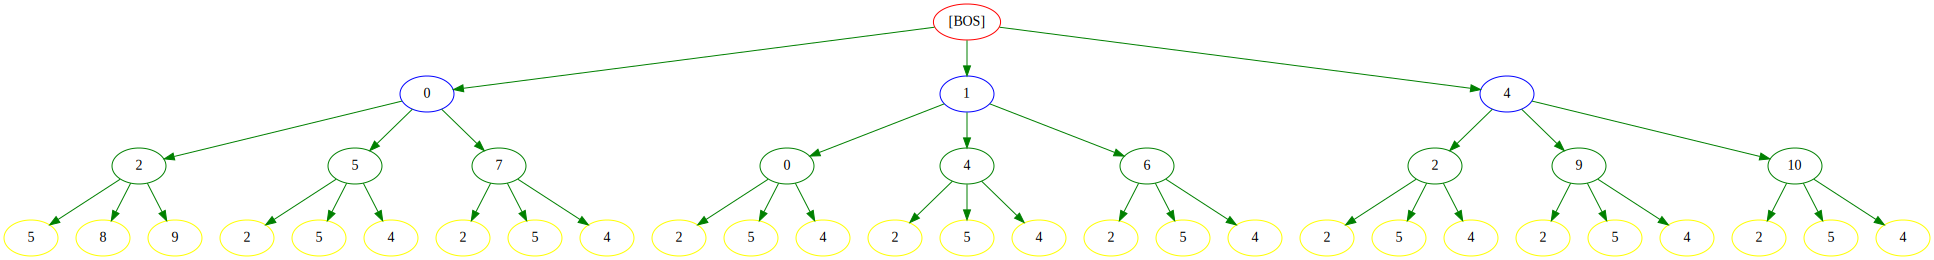

In [8]:
label_tree_viz(label_tree)

**experiment results**

| date | description | ROUGE-1-F | explanatory factor |
| :-- | :--: | :--: | :--: |
| 11.1 | sparse loss according to the heuristic rule | 34.94 | without auto-regressive method and the information is not be fully used |
| 11.3 | auto-regressive predicting the rule | 38.78 | generate the label sequence in order  |
| 11.6 | ignore the order | 41.68 | loss the order information |


**analogy problem**

- knapsack problem
    + with a limit of summary words - the space of the bag
    + ROUGE-R (the num of the matched grams) - the recurrsive formalation of reward

**notations&formalation**

- $num(matched gram set) = P_i \times len(s_i) + P_i \times len(s_i)- len(s_i \cap s_j) \times \frac{P_i \times len(s_i) + P_j \times len(s_j)}{len(s_i)+len(s_j)}$

**pseudo code**
![](./img/2019-11-15_120736.png)